# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('Advertising.csv', index_col=0)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [3]:
X = data.drop(['sales'], axis=1).values.reshape(200, 3)
y = data['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [4]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
# Здесь убрал решейп, т.к. дальше он в противном случае некорректно производит операции с векторами (200, 1) и (200, )
# y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200,)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [5]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [6]:
# Непонятно, для чего дан псевдокод, который уже реализует алгоритм координатного спуска
# Хоть и написано, что можно придумать свой, но он буквально просто представляет собой формулы алгоритма, только в виде кода
# Непонятно, что тут ещё выдумывать. Разве что можно обернуть в функцию
# Ну и функция потерь непонятно зачем вычисляется, если цикл ограничен количеством итераций

def coordinate_descent(X, y, num_iters=1000):
    m = X.shape[0]
    n = X.shape[1]
    w = np.zeros(n)
    for i in range(num_iters):
        for k in range(n):
            # Вычисляем прогноз без k-ого фактора
            h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
            # Обновляем новое значение k-ого коэффициента
            w[k] =  (X[:,k].T @ (y - h))
            # Вычисляем функцию потерь
            cost = sum(((X @ w) - y) ** 2) / len(y)
    return w

coordinate_descent(X, y)

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [7]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [8]:
X = data.drop(['sales'], axis=1).values.reshape(200, 3)
y = data['sales'].values

X = (X -np.mean(X, axis=0)) / np.std(X, axis=0)

**Добавим единичный столбец**

In [9]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [10]:
def mse_error(y_true, y_pred):
    return sum((y_true - y_pred) ** 2) / len(y_true)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [11]:
y_pred = np.mean(y)
mse_error(y, y_pred)

27.085743749999985

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [12]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [13]:
# Непонятно, обязательно ли по заданию называть train_ind, но оно ухудшает читаемость, поэтому поставил просто i
def stoch_grad_step(X, y, w, i, eta):
    # делаем копию оригинального вектора весов, т.к. иначе он будет изменятся вместе с w_new
    w_new = w.copy()
    for j in range(len(w)):
        w_new[j] -= 2 * eta * X[i, j] * (X[i] @ w - y[i])
    return w_new 

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [14]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, r_min):
    # Инициализируем расстояние между векторами
    r = np.inf
    # Список значений MSE
    errors = []
    # Счётчик итераций
    n_iter = 0
    # Цикл выполняется до тех пор, пока расстояния между векторами не станут меньше r_min, либо пока не будет превышено число итераций
    while (r > r_min) and (n_iter < max_iter):
        # Индекс объекта выборки
        i = np.random.randint(0, X.shape[0])
        # Считаем текущее значение MSE
        y_pred = X @ w
        errors.append(mse_error(y, y_pred))
        # Вычисляем обновлённый вектор весов при помощи функции для шага SGD
        w_new = stoch_grad_step(X, y, w, i, eta)
        # Вычисляем обновлённое расстояние между векторами
        r = np.linalg.norm(w_new - w)
        w = w_new
        n_iter += 1
    # Считаем финальное значение MSE
    errors.append(mse_error(y, X @ w))
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

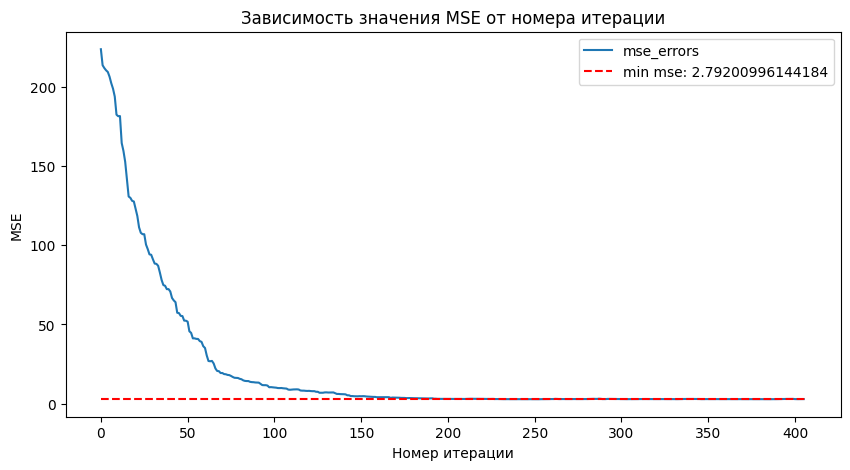

In [45]:
import matplotlib.pyplot as plt
# Вычисляем веса и ошибки 
w, errors = stochastic_gradient_descent(X, y, w=np.zeros(4), eta=0.01, max_iter=1e5, r_min=0.0001)
# Строим график зависимости значения MSE от номера итерации
graph = plt.figure(figsize=[10, 5])
plt.title('Зависимость значения MSE от номера итерации')
plt.xlabel('Номер итерации')
plt.ylabel('MSE')
plt.plot(list(range(len(errors))), errors, label='mse_errors')
plt.hlines(np.array(errors).min(),0,len(errors), color='r', linestyle='--', label=f'min mse: {np.array(errors).min()}')
plt.legend();

**Выведите вектор весов, к которому сошелся метод.**

In [16]:
w

array([13.25350764,  4.26442952,  2.25946029,  0.51557966])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [33]:
errors[-1]

2.880825165617311